In [127]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from rdkit import Chem
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [128]:
base_path = "/home/wrojas/dev/RECETOX/ei_spectra_predictions/analysis/data/matching/matchspectra_R"
base_path_a = "/home/wrojas/dev/RECETOX/ei_spectra_predictions/analysis/data/matching/matchms"
file_path1 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp3_norm.tsv")
file_path2 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp5_norm.tsv")
file_path3 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp10_norm.tsv")
file_path4 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_tp20_norm.tsv")
file_path5 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp3_norm.tsv")
file_path6 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp5_norm.tsv")
file_path7 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp10_norm.tsv")
file_path8 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_tp20_norm.tsv")
file_path9 = os.path.join(base_path, "match_1%", "match_ref_norm", "matchSpectra_results_source_1%_all_peaks_norm.tsv")
file_path10 = os.path.join(base_path, "match_10%", "match_ref_norm", "matchSpectra_results_source_10%_all_peaks_norm.tsv")
file_path11 = os.path.join(base_path, "match_1%", "matchSpectra_results_source_1%_all_peaks.tsv")
file_path12 = os.path.join(base_path_a, "matchms_1%", "Galaxy34-[matchms_scores_formatter_on_data_33]_1%_all_peaks_ref_norm.tsv")

In [129]:
data1 = pd.read_csv(file_path1, sep="\t")
data2 = pd.read_csv(file_path2, sep="\t")
data3 = pd.read_csv(file_path3, sep="\t")
data4 = pd.read_csv(file_path4, sep="\t")
data5 = pd.read_csv(file_path5, sep="\t")
data6 = pd.read_csv(file_path6, sep="\t")
data7 = pd.read_csv(file_path7, sep="\t")
data8 = pd.read_csv(file_path8, sep="\t")
data9 = pd.read_csv(file_path9, sep="\t")
data10 = pd.read_csv(file_path10, sep="\t")
data11 = pd.read_csv(file_path11, sep="\t")
data12 = pd.read_csv(file_path12, sep="\t")

In [130]:
#same_query_ref = results.loc[results['query'] == results['reference']]
same_query_ref1 = data1.loc[data1['name'] == data1['target_name']]
same_query_ref2 = data2.loc[data2['name'] == data2['target_name']]
same_query_ref3 = data3.loc[data3['name'] == data3['target_name']]
same_query_ref4 = data4.loc[data4['name'] == data4['target_name']]
same_query_ref5 = data5.loc[data5['name'] == data5['target_name']]
same_query_ref6 = data6.loc[data6['name'] == data6['target_name']]
same_query_ref7 = data7.loc[data7['name'] == data7['target_name']]
same_query_ref8 = data8.loc[data8['name'] == data8['target_name']]
same_query_ref9 = data9.loc[data9['name'] == data9['target_name']]
same_query_ref10 = data10.loc[data10['name'] == data10['target_name']]
same_query_ref11 = data11.loc[data11['name'] == data11['target_name']]
same_query_ref12 = data12.loc[data12['query'] == data12['reference']]
#same_query_ref.to_csv("/home/wrojas/dev/RECETOX/ei_spectra_predictions/analysis/data/same_query_matchSpectra_results_source_0.1_int.tsv", sep='\t', index=False)

In [126]:
import plotly.graph_objs as go

def plot_histograms_sidebyside(same_query_ref1, same_query_ref2, same_query_ref3, same_query_ref4, same_query_ref5, column_name, xaxis_title='', title=''):
    # Define number of bins
    n_bins = 10

    # Create data arrays
    x1 = same_query_ref1[column_name]
    x2 = same_query_ref2[column_name]
    x3 = same_query_ref3[column_name]
    x4 = same_query_ref4[column_name]
    x5 = same_query_ref5[column_name]

    # Create histogram traces
    trace1 = go.Histogram(x=x1, nbinsx=n_bins, name='All peaks ({})'.format(len(x1)), xbins=dict(start=0, end=1))
    trace2 = go.Histogram(x=x2, nbinsx=n_bins, name='Top 3 peaks ({})'.format(len(x2)), xbins=dict(start=0, end=1))
    trace3 = go.Histogram(x=x3, nbinsx=n_bins, name='Top 5 peaks ({})'.format(len(x3)), xbins=dict(start=0, end=1))
    trace4 = go.Histogram(x=x4, nbinsx=n_bins, name='Top 10 peaks ({})'.format(len(x4)), xbins=dict(start=0, end=1))
    trace5 = go.Histogram(x=x5, nbinsx=n_bins, name='Top 20 peaks ({})'.format(len(x5)), xbins=dict(start=0, end=1))

    # Create layout
    layout = go.Layout(title=title,
                       xaxis=dict(title=xaxis_title, range=[0, 1], dtick=0.1, tickfont=dict(size=15)),
                       yaxis=dict(title='Frequency', range=[0, 140], tickfont=dict(size=15)),
                       legend=dict(x=0.81, y=1.0),
                       font=dict(size=17))

    # Create figure
    fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)

    # Display the plot
    fig.show()

In [53]:
mz_scoring = pd.read_csv("/home/wrojas/dev/RECETOX/ei_spectra_predictions/analysis/data/filtered/matchms_mz_matching.tsv", sep='\t')
same_query_mz_match = mz_scoring.loc[mz_scoring['query'] == mz_scoring['reference']]
mz_data = same_query_mz_match['CosineHungarian_0.01_1.0_0.0_scores']

def plot_histogram(x, xaxis_title='', title=''):
    # Define number of bins
    n_bins = 20
  

    # Create histogram traces
    trace1 = go.Histogram(x=x, nbinsx=n_bins, name='All peaks ({})'.format(len(x)), xbins=dict(start=0, end=1))
  

    # Create layout
    layout = go.Layout(title=title,
                       xaxis=dict(title=xaxis_title, range=[0, 1], dtick=0.1, tickfont=dict(size=15)),
                       yaxis=dict(title='Frequency', range=[0, 140], tickfont=dict(size=15)),
                       legend=dict(x=0.81, y=1.0),
                       font=dict(size=17))

    # Create figure
    fig = go.Figure(data=[trace1], layout=layout)

    # Display the plot
    fig.show()

plot_histogram(mz_data)

In [31]:
plot_histograms_sidebyside(same_query_ref9, same_query_ref11, same_query_ref2, same_query_ref3, same_query_ref4, 'score',  'Score', 'MatchSpectra: filter -> 1%I')

In [32]:
plot_histograms_sidebyside(same_query_ref9, same_query_ref1, same_query_ref2, same_query_ref3, same_query_ref4, 'score',  'Score', 'MatchSpectra: filter -> 1%I | match -> 5ppm & normalized')

In [33]:
plot_histograms_sidebyside(same_query_ref9, same_query_ref1, same_query_ref2, same_query_ref3, same_query_ref4, 'reverse_score',  'Reverse score', 'MatchSpectra: filter -> 1%I | match -> 5ppm & normalized')

In [34]:
plot_histograms_sidebyside(same_query_ref10, same_query_ref5, same_query_ref6, same_query_ref7, same_query_ref8, 'score',  'Score', 'MatchSpectra: filter -> 10%I | match -> 5ppm & normalized')

In [35]:
plot_histograms_sidebyside(same_query_ref10, same_query_ref5, same_query_ref6, same_query_ref7, same_query_ref8, 'reverse_score',  'Reverse score', 'MatchSpectra: filter -> 10%I | match -> 5ppm & normalized')

In [36]:
# def plot_histogram(data, xaxis_title, title, yaxis_title='Number of molecules', nbinsx=40, tick0=0, dtick=0.05, tickfont_size=16, yaxis_max=None, yaxis_step=None):
#     histogram = go.Histogram(x=data, nbinsx=nbinsx)
#     layout = go.Layout(title=title, xaxis_title=xaxis_title, yaxis_title=yaxis_title,
#                        xaxis=dict(tickmode='linear', tick0=tick0, dtick=dtick, tickfont=dict(size=tickfont_size)),
#                        yaxis=dict(tickmode='linear', tick0=0, dtick=yaxis_step, tickfont=dict(size=tickfont_size), range=[0, yaxis_max]))
#     figure = go.Figure(data=[histogram], layout=layout)
#     figure.show()

In [37]:
# plot_histogram(same_query_ref1['score'], xaxis_title='Score', title='matchSpectra_results_source_1%_tp3.tsv', tickfont_size=16, yaxis_max=70, yaxis_step=15)

In [69]:
def has_halogen_atoms(mol):
    # Check if the molecule contains any halogen atoms
    for atom in mol.GetAtoms():
        if atom.GetSymbol() in ['F', 'Cl', 'Br', 'I']:
            return True

    return False

In [94]:
def append_classes(df, left_on):
    molecules = Chem.SDMolSupplier("/home/wrojas/dev/RECETOX/ei_spectra_predictions/data/RECETOX_GC-EI-MS_20201028.sdf")
    class_names = pd.DataFrame({
        "class" : [m.GetProp("Class") for m in molecules],
        "superclass" : [m.GetProp("Superclass") for m in molecules],
        "molname" : [m.GetProp("NAME") for m in molecules],
        "n_atoms" : [m.GetNumAtoms() for m in molecules],
        "n_bonds" : [m.GetNumBonds() for m in molecules],
        "has_halogen": [has_halogen_atoms(m) for m in molecules],
        "has_chlorine": [m.HasSubstructMatch(Chem.MolFromSmarts('Cl')) for m in molecules],
        "has_bromine": [m.HasSubstructMatch(Chem.MolFromSmarts('Br')) for m in molecules],
        "has_iodine": [m.HasSubstructMatch(Chem.MolFromSmarts('I')) for m in molecules],
        "has_fluorine": [m.HasSubstructMatch(Chem.MolFromSmarts('F')) for m in molecules],
        
    })
    merged_df = pd.merge(df, class_names, left_on=left_on, right_on='molname')
    return merged_df


In [59]:
def make_boxplot(grouped_df: pd.DataFrame, colname: str, legend: str):
    #Create the plot with a width of 10 inches
    fig, ax = plt.subplots(figsize=(17, 5))

    # Create a list of DataFrames, one for each group
    grouped_dfs = [grouped_df.get_group(group) for group in grouped_df.groups]

    # Create a boxplot for each DataFrame
    ax.boxplot([df[colname] for df in grouped_dfs])
    

    labels = [f"{group} ({len(x)})" for group, x in grouped_df]
    # Set the x-axis tick labels and increase the distance between ticks to 0.5 inches
    ax.set_xticklabels(labels, rotation=90)
    ax.tick_params(axis='x', which='major', pad=0.5)
    
    # Set the x-axis label, y-axis label, and plot title
    #ax.set_ylim([0, 1])
    ax.set_xlabel('Class', fontsize=16)
    ax.set_ylabel(colname, fontsize=16)
    ax.legend([legend], fontsize=14)
    
    # Show the plot
    plt.show()
	

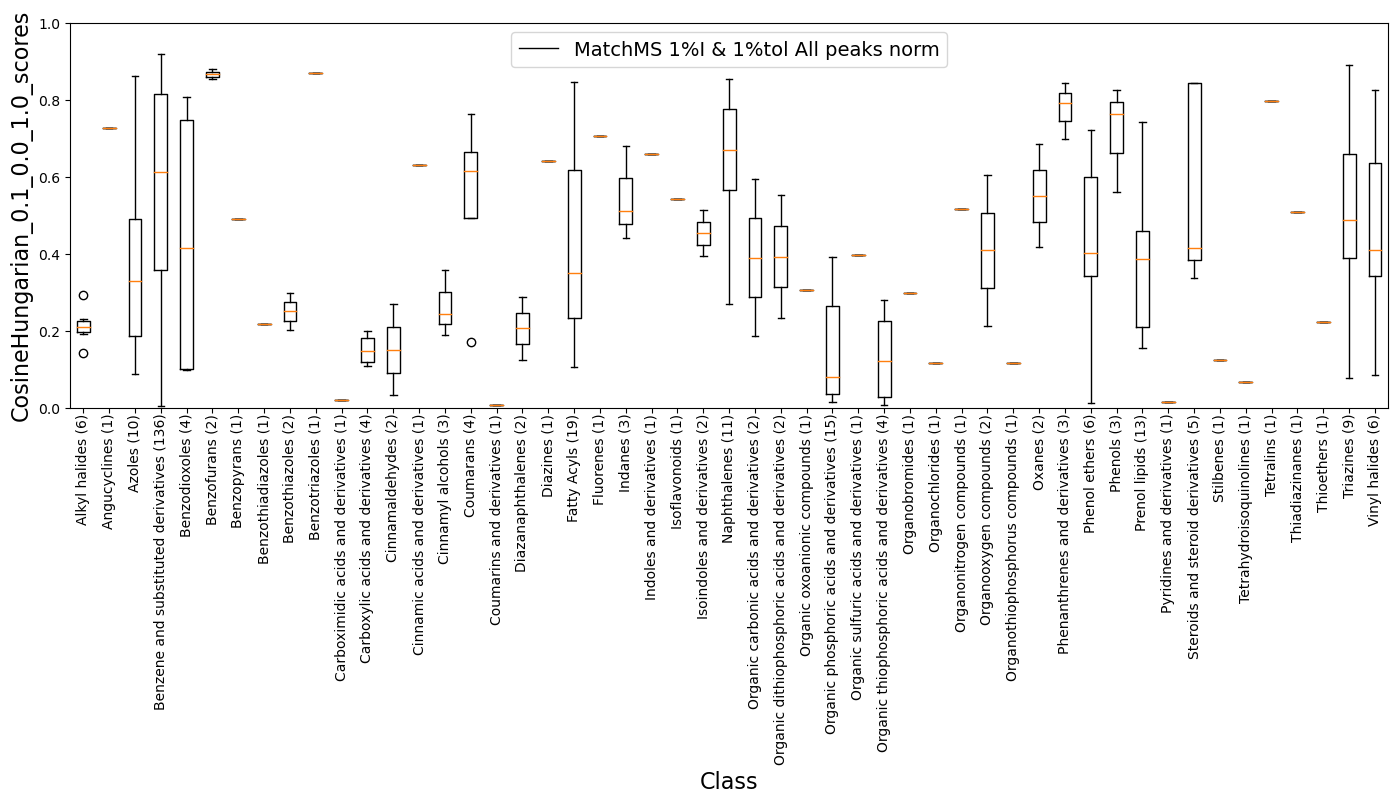

In [42]:
make_boxplot(merged_df.groupby('class'), 'CosineHungarian_0.1_0.0_1.0_scores', 'MatchMS 1%I & 1%tol All peaks norm')

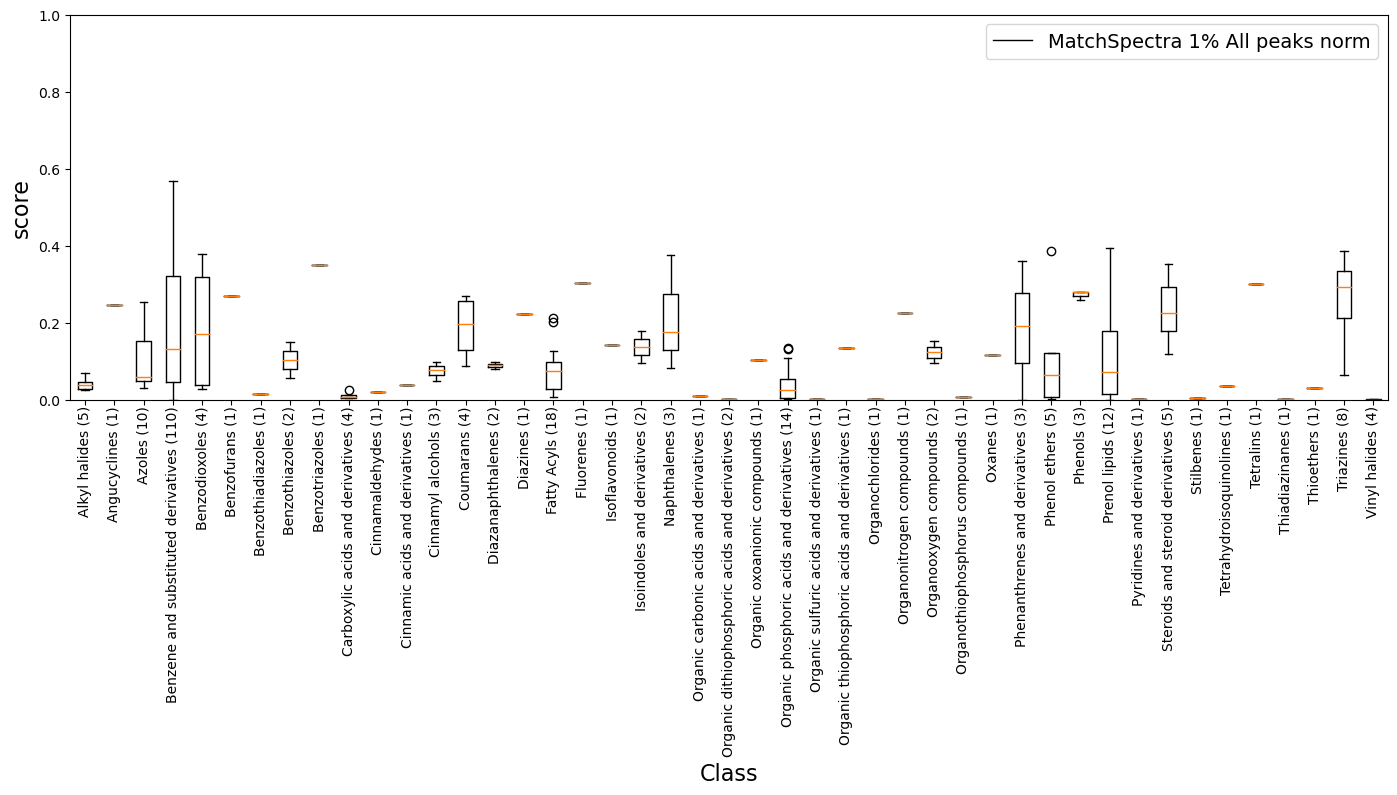

In [45]:
make_boxplot(merged_df.groupby('class'), 'score', 'MatchSpectra 1% All peaks norm')

In [1]:
make_boxplot(merged_df.groupby('class'), 'reverse_score', 'MatchSpectra 1% All peaks norm')

NameError: name 'make_boxplot' is not defined

In [ ]:
# make_boxplot(merged_df.groupby('class'), 'n_atoms')

In [ ]:
# import matplotlib.ticker as ticker

# def plot_boxplot(df, class_col, score_col):
#     # group the DataFrame by the class column and calculate the median of each group
#     medians = df.groupby(class_col)[score_col].median()

#     # sort the groups based on their median values
#     sorted_groups = medians.sort_values().index

#     # sort the DataFrame based on the sorted group order
#     sorted_df = df.astype({class_col: pd.CategoricalDtype(categories=sorted_groups)})
#     sorted_df = sorted_df.sort_values(by=class_col)
    
#     # print the number of classes in the DataFrame
#     print(f"Number of classes: {len(sorted_groups)}")
#     # create a figure with one subplot
#     fig, ax1 = plt.subplots(1, figsize=(16, 6))

#     # plot the boxplot sorted by median in the subplot
#     scores = [sorted_df.loc[sorted_df.loc[:, class_col] == group, score_col] for group in sorted_groups]
#     positions = list(range(1, len(sorted_groups) + 1))
#     labels = [f"{group} ({len(sorted_df.loc[sorted_df.loc[:, class_col] == group])})" for group in sorted_groups]
#     ax1.boxplot(x=scores, positions=positions, labels=labels)
#     ax1.set_xticks(positions)
#     ax1.set_xticklabels(labels, rotation=90)
#     ax1.tick_params(axis='x', which='major', pad=0.5 * plt.rcParams['font.size'])
#     ax1.set_xlabel(class_col)
#     ax1.set_ylabel(score_col)
#     ax1.set_title('Boxplot')
#     # set the y-axis limits to 0 and 8
#     ax1.set_ylim([0, 0.9])

#     # set the y-axis tick interval to 0.2
#     ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

#     # display the subplot
#     plt.show()

In [ ]:
# plot_boxplot(merged_df, 'class', 'reverse_score')

In [95]:
top5 = pd.read_csv("../data/matchms_top5_comparison.tsv", sep='\t')
top5_same = top5.loc[top5['query'] == top5['reference']]
merged_top5_same = append_classes(top5_same, 'query')


[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:13] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:14] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[12:35:14] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)


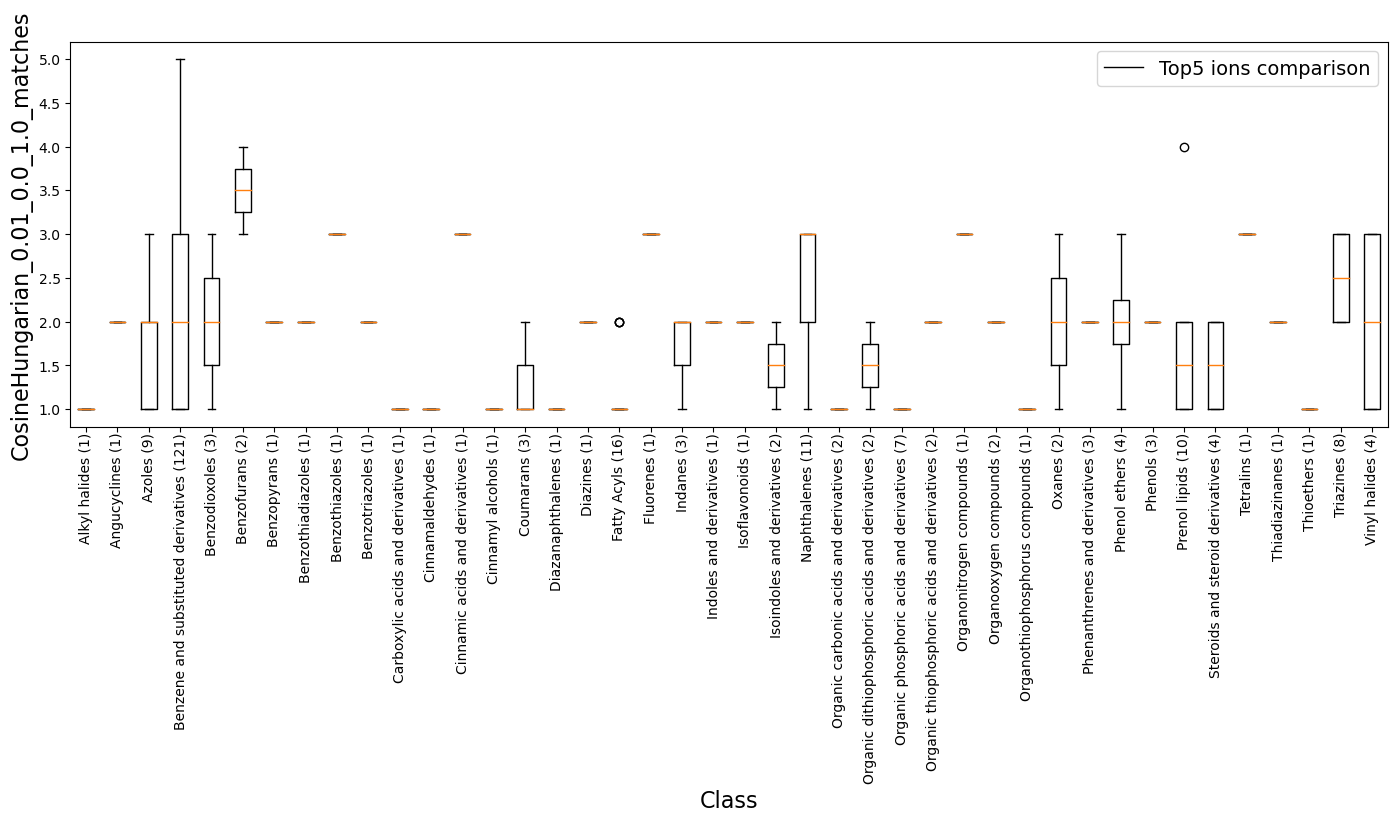

In [96]:
make_boxplot(merged_top5_same.groupby('class'), 'CosineHungarian_0.01_0.0_1.0_matches', 'Top5 ions comparison')

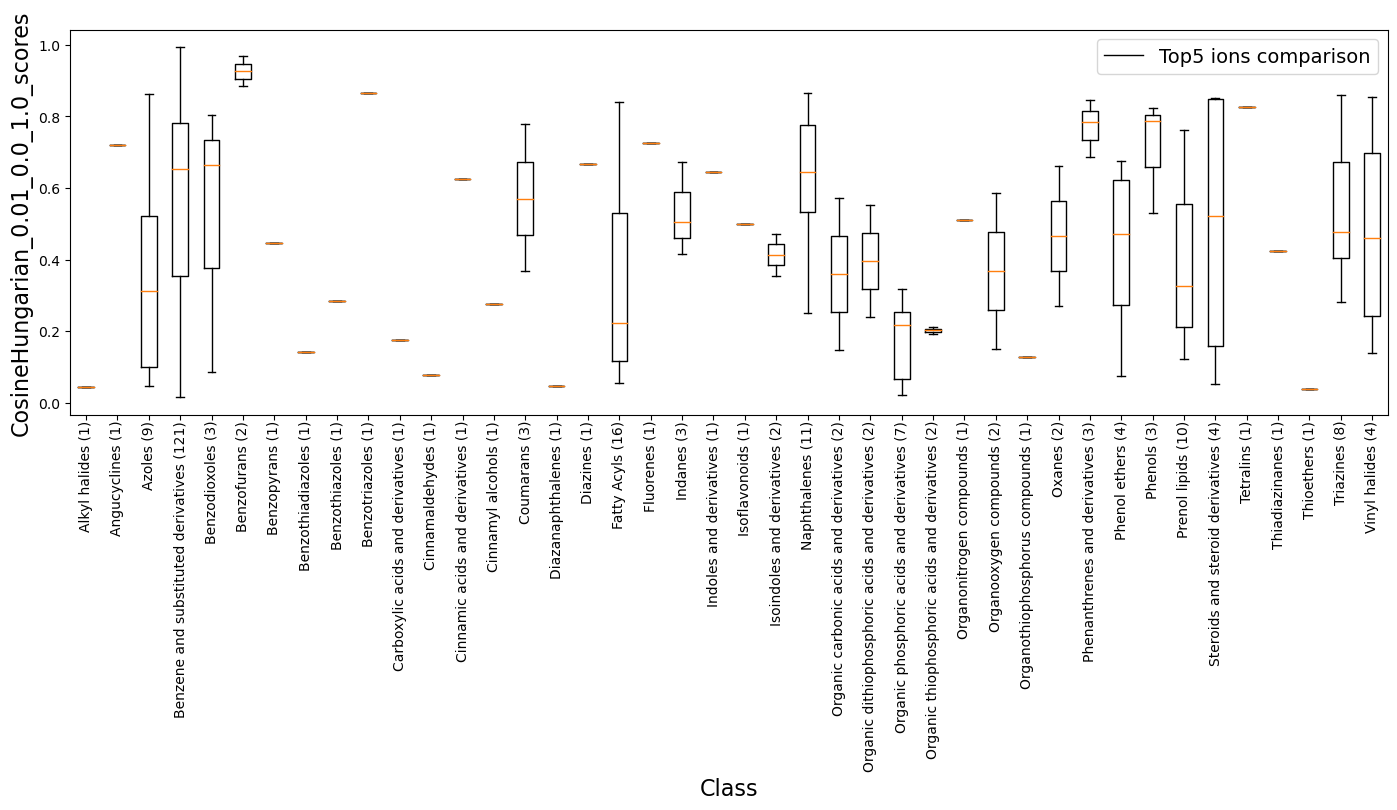

In [97]:
make_boxplot(merged_top5_same.groupby('class'), 'CosineHungarian_0.01_0.0_1.0_scores', 'Top5 ions comparison')

In [64]:
count = len(top5_same[top5_same['CosineHungarian_0.01_0.0_1.0_scores']>0.65])

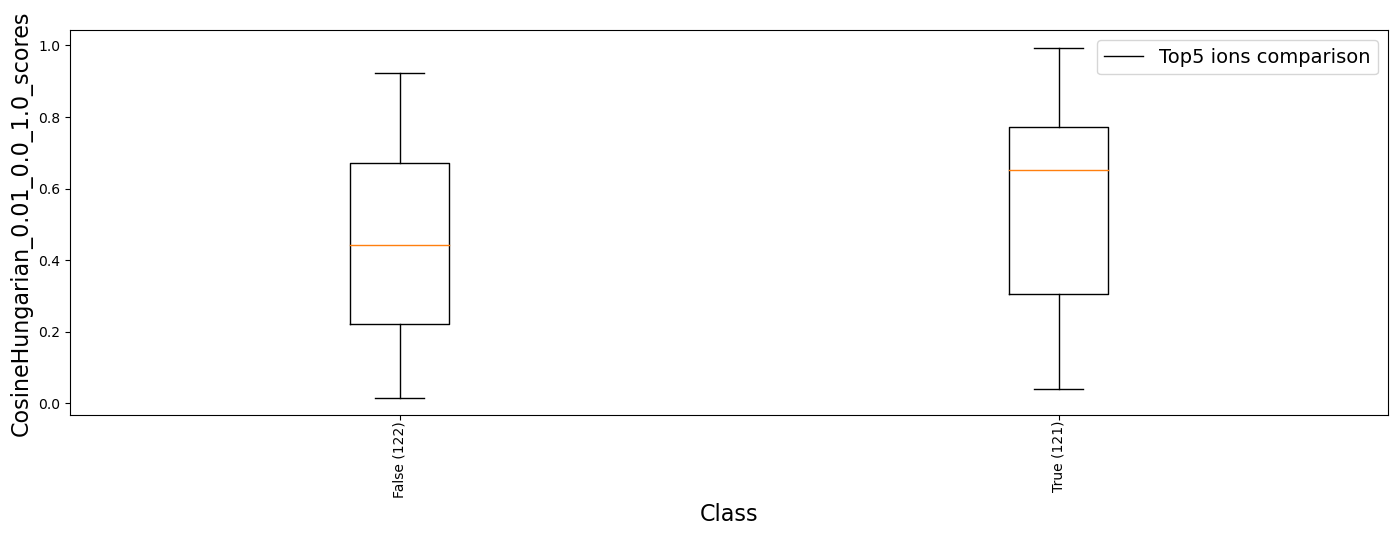

In [93]:
make_boxplot(merged_top5_same.groupby('has_halogen'), 'CosineHungarian_0.01_0.0_1.0_scores', 'Top5 ions comparison')

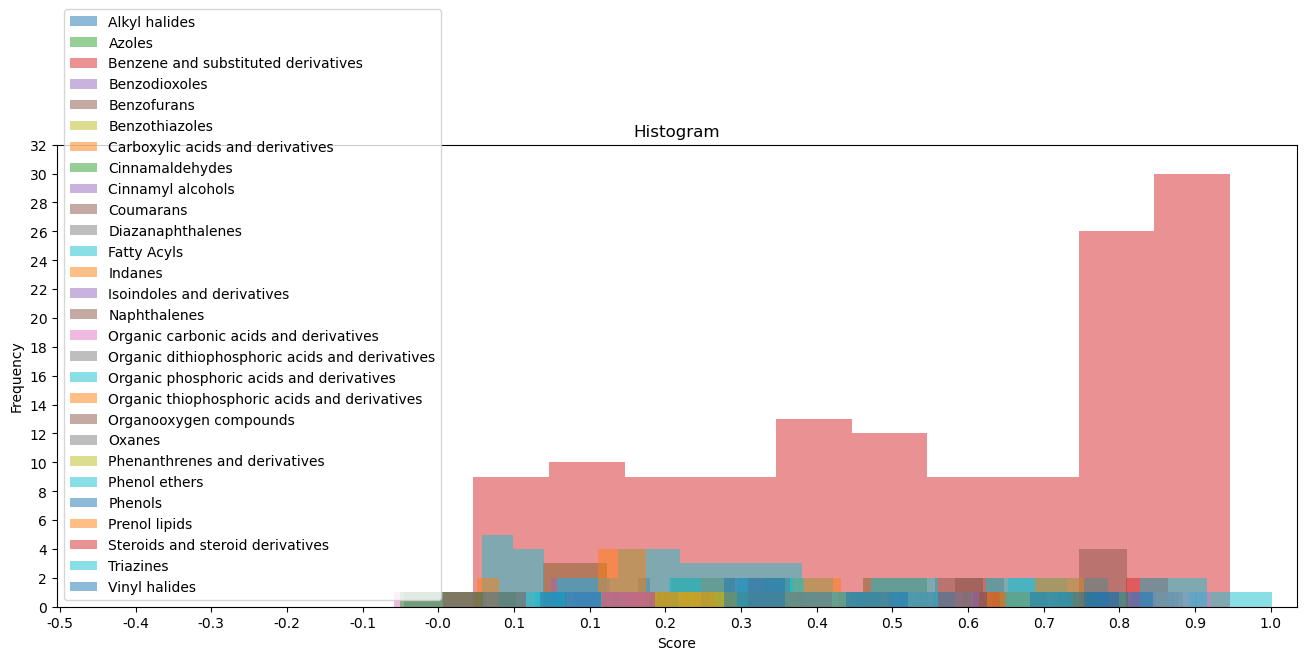

In [667]:

# group the DataFrame by the 'class' column
grouped_df = merged_df.groupby('class')

# create a figure with one subplot
fig, ax1 = plt.subplots(1, figsize=(16, 6))

# plot a histogram of the 'CosineHungarian_score' column for each group
for group_name, group_df in grouped_df:
    freq = len(group_df)
    if freq > 1:
        ax1.hist(group_df['CosineHungarian_0.1_0.0_1.0_scores'], alpha=0.5, label=group_name)
    else:
        ax1.hist(group_df['CosineHungarian_0.1_0.0_1.0_scores'], alpha=0.5)

# set the x-axis label, y-axis label, and title
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')

# set the x-axis ticks and tick labels
x_min = merged_df['CosineHungarian_0.1_0.0_1.0_scores'].min()
x_max = merged_df['CosineHungarian_0.1_0.0_1.0_scores'].max()
x_range = x_max - x_min
x_ticks = np.arange(x_min-0.5, x_max+1.0, x_range/10)
x_tick_labels = [str(round(x, 1)) for x in x_ticks]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels)

# set the x-axis range
ax1.set_xlim([-0.5, 1.0])

# set the y-axis ticks and tick labels
y_max = ax1.get_ylim()[1]
y_ticks = np.arange(0, y_max+1, 2)
ax1.set_yticks(y_ticks)

# add a legend to the plot for groups with frequency greater than 1
handles, labels = ax1.get_legend_handles_labels()
handles_filtered = []
labels_filtered = []
for handle, label in zip(handles, labels):
    if label != '' and label not in labels_filtered:
        labels_filtered.append(label)
        handles_filtered.append(handle)
ax1.legend(handles_filtered, labels_filtered)

# display the plot
plt.show()